<a href="https://colab.research.google.com/github/Marvaindrasari/Machine-learning-deep-learning-portofolio/blob/main/04_02_Fire_Marva_Indrasari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


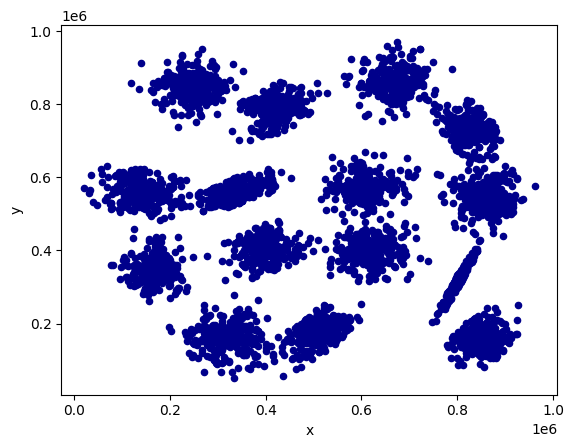

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

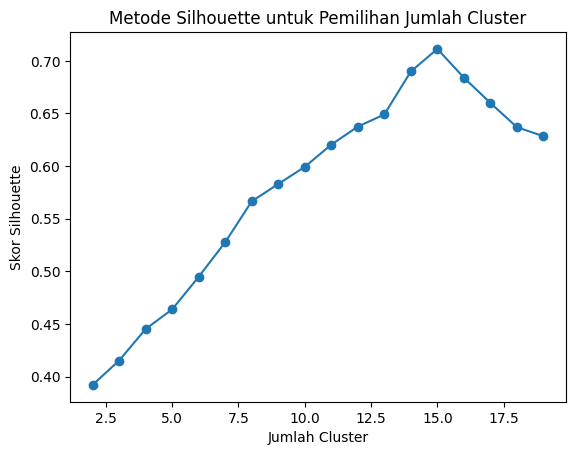

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Skor Silhouette')
plt.title('Metode Silhouette untuk Pemilihan Jumlah Cluster')
plt.show()
#END CODE

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
from sklearn.cluster import KMeans

#START CODE
kmeans = cluster.KMeans(n_clusters=15, random_state=0)
kmeans.fit(data)
label = kmeans.predict(data)
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = kmeans.predict(data)
result.head()
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


In [ ]:
kmeans.cluster_centers_

array([[244654.8856305 , 847642.04105572],
       [398870.04843305, 404924.06552706],
       [858947.9713467 , 546259.65902579],
       [670929.06818182, 862765.73295455],
       [852058.45259939, 157685.52293578],
       [167856.14071856, 347812.71556886],
       [320602.55      , 161521.85      ],
       [617926.67761194, 399415.94925373],
       [139395.22898551, 558143.94202899],
       [337264.76291793, 562123.37993921],
       [606574.95622896, 574455.16835017],
       [801616.78164557, 321123.34177215],
       [417799.69426752, 787001.99363057],
       [507818.31339031, 175610.41595442],
       [823421.2507837 , 731145.27272727]])

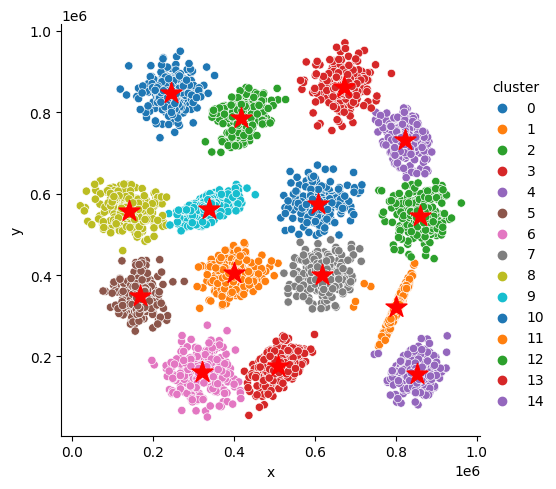

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', data=result, hue='cluster', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], color='r', marker='*', s=250)
#END CODE